# Predicting Total Loan Amounts

## Description
The aim of this worksheet is to predict the total loan amount taken by a bank's customers using their income, property area and the number of dependents they have. 
> **There are two models in this document:** 
* **Model 1:** a model to predict loan amount using income
* **Model 2:** a model that predicts total loan amount, using `income`, `property_area`, and `dependents`.  
<ul>
 

## Table of Contents
<ul>
<li><a href="#Model 1">Model 1</a></li>
<li><a href="#1 Summary">Model 1 Summary</a></li>
<li><a href="#Model 2">Model 2</a></li>
<li><a href="#2 Summary">Model 2 Summary</a></li>    
<li><a href="#conclusions">Conclusions</a></li> 
</ul>

In [1]:
#importing necessary libraries and reading data files
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('predictive_analysis.csv')
df.head()

,income,credit_history,property_area,loan_status,dependents,total_loan_amount
0,1299,Yes,Urban,Yes,2,204
1,3620,Yes,Sub-urban,Yes,0,300
2,3459,Yes,Sub-urban,No,0,300
3,2378,Yes,Urban,No,0,324
4,4106,Yes,Rural,Yes,3,720


<a id='Model 1'></a>
## Model 1
 
`1.` For the first model, I will fit a model to predict `total_loan_amount` using `income`.

In [2]:
#creating an intercept
df['intercept'] = 1

#fitting a linear model
lm = sm.OLS(df['total_loan_amount'], df[['intercept', 'income']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_loan_amount   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     145.8
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           8.37e-30
Time:                        13:16:43   Log-Likelihood:                -4909.1
No. Observations:                 528   AIC:                             9822.
Df Residuals:                     526   BIC:                             9831.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3048.1005    204.998     14.869      0.000    2645.386    3450.815
income         0.4213      0.035     12.075      0.000       0.353       0.490
==============================================================================
Omnibus:                      185.392   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1048.100
Skew:                           1.429   Prob(JB):                    2.56e-228
Kurtosis:                       9.282   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

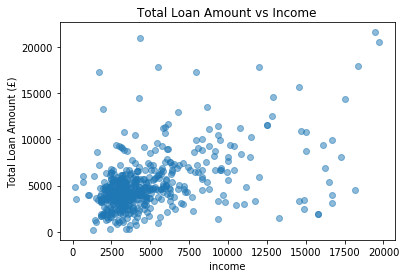

In [3]:
#plotting a scatter plot to illustrate relationship
plt.scatter(df['income'], df['total_loan_amount'], alpha=0.5)
plt.title('Total Loan Amount vs Income')
plt.xlabel("income")
plt.ylabel("Total Loan Amount (£)")
plt.show() 

<a id='1 Summary'></a>
## Model 1 Summary

The results showed that: 
1. For every 100% increase in income, the expected increase in the median total loan amount is £421.30.
2. 21.7% of the variability in total loan amount can be explained by the income of customers.
3. The p-value of 0.00 associated with income is statistically significant in providing information in predicting the median total loan amount of each customer.

<a id='Model 2'></a>
## Model 2

 `2.` In this second model for predicting total loan amount, I will use `income`, `property_area`, and `dependents`  to predict `total_loan_amount`. I will use dummy variables for my categorical variables, and add an intercept to the model. I will also use `3 dependants` and `Rural` as my baselines for the model. This means that the OLS regresssion results will be comparative to these baseline categories.

In [4]:
#adding dummy variables for the property area and dependants
df[['Rural', 'Sub-urban', 'Urban']] = pd.get_dummies(df['property_area'])
df[['0', '1', '2', '3']] = pd.get_dummies(df['dependents'])
df.head()


,income,credit_history,property_area,loan_status,dependents,total_loan_amount,intercept,Rural,Sub-urban,Urban,0,1,2,3
0,1299,Yes,Urban,Yes,2,204,1,0,0,1,0,0,1,0
1,3620,Yes,Sub-urban,Yes,0,300,1,0,1,0,1,0,0,0
2,3459,Yes,Sub-urban,No,0,300,1,0,1,0,1,0,0,0
3,2378,Yes,Urban,No,0,324,1,0,0,1,1,0,0,0
4,4106,Yes,Rural,Yes,3,720,1,1,0,0,0,0,0,1


In [5]:
#fiting a linear model to predict total loan amount using income, property_area, and dependents.

#adding intercept
df['intercept'] = 1
#creating the linear model
lm = sm.OLS(df['total_loan_amount'], df[['intercept', 'income','0', '1', '2', 'Sub-urban', 'Urban']])
#the baselines are dependents 3 and property area Rural

results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_loan_amount   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     28.65
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.18e-29
Time:                        13:16:43   Log-Likelihood:                -4898.4
No. Observations:                 528   AIC:                             9811.
Df Residuals:                     521   BIC:                             9841.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4598.0766    454.079     10.126      0.000    3706.026    5490.127
income         0.4082      0.035     11.806      0.000       0.340       0.476
0          -1484.0705    414.101     -3.584      0.000   -2297.584    -670.557
1           -924.5770    478.443     -1.932      0.054   -1864.491      15.337
2           -940.2704    471.593     -1.994      0.047   -1866.727     -13.814
Sub-urban   -243.6970    276.386     -0.882      0.378    -786.665     299.271
Urban       -726.9583    295.966     -2.456      0.014   -1308.391    -145.526
==============================================================================
Omnibus:                      169.167   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              860.337
Skew:                           1.322   Prob(JB):                    1.51e-187
Kurtosis:                       8.667   Cond. No.                     4.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='2 Summary'></a>
## Model 2 Summary
The p-values for sub-urban and 1 dependant show a statistical insignificance, there by implying that those categorial variables are not statistically significant for predicting total loan amount.
1. The predicted difference in the total loan amount of a customer with 0 dependants as compared to a customer with 3 or more dependants, holding other variables constant is -£1484 (approx.)
2. The predicted difference in the total loan amount of a customer living in an urban area as compared to a customer in a rural area, holding other variables constant is -£726 (approx.)
3. A customer with 3 dependents is likely to have a total loan amount of £940 more than a customer with 2 dependents.

<a id='conclusions'></a>
## Conclusions
This project aimed to predict loan amounts based on different quantitative and categorical variables. This was achieved using statsmodel libraries in python to create 2 prediction models. 

> Model 1: 
The key results showed that there is a positive relationship between the customers' income and loan amount taken. This positive relationship is depicted by an R value of `0.217`, implying that 21.7% of the variability in total loan amount can be explained by the income of customers. The p-value of 0.00 associated with income is statistically significant in providing information in predicting the total loan amount of each customer.
>

>Model 2: 
The results from model 2 returned statistically insignificant results for sub-urban and 1 dependant categories. It was also seen that a customer with 3 dependents is likely to have a total loan amount of £940 more than a customer with 2 dependents. The predicted difference in the total loan amount of a customer living in an urban area as compared to a customer in a rural area, holding other variables constant is -£726 (approx.)
>

The analysis returned results with a posibility of multicolinearity, and so results from this analysis must be read with that in mind. For future improvement, it may be useful to test for multicolinearity by either looking at the correlation of each explanatory variable with each other explanatory variable (with a plot or the correlation coefficient), or by looking at Variance Inflation Factors (VIFs) for each variable.